In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/1axis'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/1axis


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Windows 10
Python version  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version  1.5.3
bifacial_radiance version  0.4.2+317.g886c8fb.dirty
pyplot  3.5.2


In [4]:
simulationname = '1axis-groundscan'

# Location
lat = 39.7555
lon = -105.2211

# Scene Parameters
azimuth_ang=90 # Facing south
tilt=30

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7 # m
albedo = 0.2
clearance_height = 0.5 # m  
nMods = 4 
nRows = 3

sceneDict = {'tilt':10,'pitch':5.7,'clearance_height':0.2,'azimuth':180, 'nMods': 20, 'nRows': 7} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/1axis
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects\PVmod.rad will be overwritten



In [7]:
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-01', endtime='2021-06-30_23')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
hub_height = 1.5
pitch = 5.7
sazm = 90
fixed_tilt_angle = None
gcr = 2 / pitch
cumulativesky = True

trakerParams = {
    'limit_angle': 50,
    'angledelta': 30,
    'backtrack': True,
    'gcr': gcr,
    'cumulativesky': cumulativesky,
    'azimuth': sazm,
    'fixed_tilt_angle': fixed_tilt_angle
}

In [9]:
trackerdict = demo.set1axis(**trakerParams)

Saving file EPWs\1axis_-60.0.csv, # points: 60
Saving file EPWs\1axis_-30.0.csv, # points: 60
Saving file EPWs\1axis_-0.0.csv, # points: 250
Saving file EPWs\1axis_30.0.csv, # points: 80


In [10]:
if cumulativesky:
    demo.genCumSky1axis()
else:
    demo.gendaylit1axis()

message: There were 60 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-60.0.rad
message: There were 59 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-30.0.rad
message: There were 238 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-0.0.rad
message: There were 78 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_30.0.rad


In [11]:
sceneDict = {
    'pitch': pitch,
    'hub_height': hub_height,
    'nMods': 5,
    'nRows': 2
}

In [12]:
trakerdict = demo.makeScene1axis(module=moduletype, sceneDict=sceneDict)
trakerdict = demo.makeOct1axis()


Making .rad files for cumulativesky 1-axis workflow
4 Radfiles created in /objects/

Making 4 octfiles in root directory.
Created 1axis_-60.0.oct
Created 1axis_-30.0.oct
Created 1axis_-0.0.oct
Created 1axis_30.0.oct


In [13]:
sensorsgroundvalues = np.array([3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])
angles = np.array([-0.0, -30.0, -60.0, 30.0])

In [14]:
trakerdict = demo.analysis1axis(append=False)

Linescan in process: 1axis_-60.0_Scene0_Row1_Module3_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2870: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Linescan in process: 1axis_-60.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-60.0_Scene0_Row1_Module3.csv
Index: -60.0. Wm2Front: 6896.410777777777. Wm2Back: 1199.5463333333332
Linescan in process: 1axis_-30.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_-30.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-30.0_Scene0_Row1_Module3.csv
Index: -30.0. Wm2Front: 12523.441111111111. Wm2Back: 2091.4856666666665
Linescan in process: 1axis_-0.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_-0.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_-0.0_Scene0_Row1_Module3.csv
Index: -0.0. Wm2Front: 111282.25555555556. Wm2Back: 16457.63777777778
Linescan in process: 1axis_30.0_Scene0_Row1_Module3_Front
Linescan in process: 1axis_30.0_Scene0_Row1_Module3_Back
Saved: results\irr_1axis_30.0_Scene0_Row1_Module3.csv
Index: 30.0. Wm2Front: 56757.79666666666. Wm2Back: 8564.237000000001


In [15]:
sensorsground = 3
trakerdict = demo.analysis1axisground(customname='_sensorsground_' + str(sensorsground), 
                                      sensorsground=sensorsground, append=True)
demo.getResults()

Linescan in process: 1axis_groundscan_-60.0_sensorsground_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-60.0_sensorsground_3_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3548.482. sensorsground: 3
Linescan in process: 1axis_groundscan_-30.0_sensorsground_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.0_sensorsground_3_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11143.566666666666. sensorsground: 3
Linescan in process: 1axis_groundscan_-0.0_sensorsground_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.0_sensorsground_3_Row1_Module3.csv
Index: -0.0. Wm2Ground: 83826.27999999998. sensorsground: 3
Linescan in process: 1axis_groundscan_30.0_sensorsground_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.0_sensorsground_3_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46906.81. sensorsground: 3


,theta,name,modNum,rowNum,sceneNum,x,y,z,mattype,rearMat,Wm2Front,Wm2Back,backRatio,surf_azm,surf_tilt,Wm2Ground
0,-0.0,1axis_-0.0_Scene0,3,1,0,"[4.898587e-17, 3.67394e-17, 2.449294e-17, 1.22...","[-0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4]","[1.521, 1.521, 1.521, 1.521, 1.521, 1.521, 1.5...","[a2.0.a0.PVmod.6457, a2.0.a0.PVmod.6457, a2.0....","[a2.0.a0.PVmod.2310, a2.0.a0.PVmod.2310, a2.0....","[111285.2, 111284.5, 111283.7, 111283.0, 11128...","[16932.99, 16725.89, 16518.79, 16447.17, 16331...","[0.15215850668230363, 0.15029846788817428, 0.1...",179.999997,0.0,NaN
1,-0.0,1axis_groundscan_-0.0_sensorsground_3,3,1,0,"[0.0, 1.408514e-07, 2.817029e-07]","[0.0, -2.85, -5.7]","[0.05, 0.05, 0.05]","[groundplane, groundplane, groundplane]",NaN,NaN,NaN,NaN,179.999997,0.0,"[29157.64, 111557.89999999998, 110763.3]"
2,-60.0,1axis_-60.0_Scene0,3,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.2181865, 0.1681865, 0.1181865, 0.06818653, ...","[1.16409, 1.250692, 1.337295, 1.423897, 1.5105...","[a2.0.a0.PVmod.6457, a2.0.a0.PVmod.6457, a2.0....","[a2.0.a0.PVmod.2310, a2.0.a0.PVmod.2310, a2.0....","[6772.449, 6810.986, 6849.53, 6888.072, 6926.6...","[1145.325, 1159.244, 1173.182, 1187.121, 1200....","[0.16911531277454983, 0.1702020573523338, 0.17...",0.000000,60.0,NaN
3,-60.0,1axis_groundscan_-60.0_sensorsground_3,3,1,0,"[0.0, 0.0, 0.0]","[0.0, 2.85, 5.7]","[0.05, 0.05, 0.05]","[groundplane, groundplane, groundplane]",NaN,NaN,NaN,NaN,0.000000,60.0,"[3446.323, 3581.72, 3617.403]"
4,-30.0,1axis_-30.0_Scene0,3,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.3569102, 0.2703076, 0.1837051, 0.09710254, ...","[1.318187, 1.368187, 1.418187, 1.468187, 1.518...","[a2.0.a0.PVmod.6457, a2.0.a0.PVmod.6457, a2.0....","[a2.0.a0.PVmod.2310, a2.0.a0.PVmod.2310, a2.0....","[12539.5, 12535.51, 12531.49, 12527.47, 12523....","[2110.522, 2106.743, 2102.946, 2099.149, 2070....","[0.16830988729136828, 0.16806199603669925, 0.1...",0.000000,30.0,NaN
5,-30.0,1axis_groundscan_-30.0_sensorsground_3,3,1,0,"[0.0, 0.0, 0.0]","[0.0, 2.85, 5.7]","[0.05, 0.05, 0.05]","[groundplane, groundplane, groundplane]",NaN,NaN,NaN,NaN,0.000000,30.0,"[10090.78, 11695.21, 11644.71]"
6,30.0,1axis_30.0_Scene0,3,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.3359102, 0.2493076, 0.1627051, 0.07610254, ...","[1.718187, 1.668187, 1.618187, 1.568187, 1.518...","[a2.0.a0.PVmod.6457, a2.0.a0.PVmod.6457, a2.0....","[a2.0.a0.PVmod.2310, a2.0.a0.PVmod.2310, a2.0....","[56793.63999999999, 56784.52, 56775.6, 56766.6...","[8726.999, 8633.658, 8540.271, 8565.936, 8509....","[0.15366155165153086, 0.1520424553726534, 0.15...",0.000000,-30.0,NaN
7,30.0,1axis_groundscan_30.0_sensorsground_3,3,1,0,"[0.0, 0.0, 0.0]","[0.0, 2.85, 5.7]","[0.05, 0.05, 0.05]","[groundplane, groundplane, groundplane]",NaN,NaN,NaN,NaN,0.000000,-30.0,"[32589.819999999996, 53841.920000000006, 54288..."


In [16]:
resultsdict = {}

for i, sensorsground in enumerate(sensorsgroundvalues):
    print("Doing sensor", i)
    print(f"sensorsground: {sensorsground}")
    trakerdict = demo.analysis1axisground(customname='1-axis_groundscan_' + str(sensorsground), 
                                          sensorsground=sensorsground, append=False)
    angleswm2dict = {}

    for i, angle in enumerate(angles):
        wm2 = []
        for i, y in enumerate(trakerdict[angle]['AnalysisObj'][0].y):
             if y >= 1 and y <= pitch - 1:
                wm2.append(trakerdict[angle]['AnalysisObj'][0].Wm2Ground[i])
        resultsdict[(sensorsground)] = np.mean(wm2)

Doing sensor 0
sensorsground: 3
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_3_Row1_Module3_Front


c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_3_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3630.1336666666666. sensorsground: 3
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_3_Row1_Module3.csv
Index: -30.0. Wm2Ground: 10937.631666666668. sensorsground: 3
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_3_Row1_Module3.csv
Index: -0.0. Wm2Ground: 83536.25. sensorsground: 3
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_3_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_3_Row1_Module3.csv
Index: 30.0. Wm2Ground: 47511.34666666667. sensorsground: 3
Doing sensor 1
sensorsground: 5
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_5_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_5_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3609.9516000000003. sensorsground: 5
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_5_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_5_Row1_Module3.csv
Index: -30.0. Wm2Ground: 10941.7752. sensorsground: 5
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_5_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_5_Row1_Module3.csv
Index: -0.0. Wm2Ground: 93229.226. sensorsground: 5
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_5_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_5_Row1_Module3.csv
Index: 30.0. Wm2Ground: 49963.840000000004. sensorsground: 5
Doing sensor 2
sensorsground: 10
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_10_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_10_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3484.7344. sensorsground: 10
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_10_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_10_Row1_Module3.csv
Index: -30.0. Wm2Ground: 10966.282000000001. sensorsground: 10
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_10_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_10_Row1_Module3.csv
Index: -0.0. Wm2Ground: 99941.39399999999. sensorsground: 10
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_10_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_10_Row1_Module3.csv
Index: 30.0. Wm2Ground: 47140.53300000001. sensorsground: 10
Doing sensor 3
sensorsground: 20
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_20_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_20_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3682.4890000000005. sensorsground: 20
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_20_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_20_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11073.401500000002. sensorsground: 20
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_20_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_20_Row1_Module3.csv
Index: -0.0. Wm2Ground: 101188.09599999998. sensorsground: 20
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_20_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_20_Row1_Module3.csv
Index: 30.0. Wm2Ground: 47350.351. sensorsground: 20
Doing sensor 4
sensorsground: 30
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_30_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_30_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3606.045833333333. sensorsground: 30
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_30_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_30_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11313.682833333332. sensorsground: 30
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_30_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_30_Row1_Module3.csv
Index: -0.0. Wm2Ground: 102262.997. sensorsground: 30
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_30_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_30_Row1_Module3.csv
Index: 30.0. Wm2Ground: 47203.11533333331. sensorsground: 30
Doing sensor 5
sensorsground: 100
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_100_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_100_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3599.3420300000002. sensorsground: 100
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_100_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_100_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11306.29977. sensorsground: 100
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_100_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_100_Row1_Module3.csv
Index: -0.0. Wm2Ground: 102400.40879999999. sensorsground: 100
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_100_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_100_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46852.6966. sensorsground: 100
Doing sensor 6
sensorsground: 150
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_150_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_150_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3645.0552266666664. sensorsground: 150
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_150_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_150_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11302.908606666666. sensorsground: 150
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_150_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_150_Row1_Module3.csv
Index: -0.0. Wm2Ground: 102268.50346666666. sensorsground: 150
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_150_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_150_Row1_M

C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_200_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3577.72555. sensorsground: 200
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_200_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_200_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11017.193870000001. sensorsground: 200
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_200_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_200_Row1_Module3.csv
Index: -0.0. Wm2Ground: 103137.03325. sensorsground: 200
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_200_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_200_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46945.52205. sensorsground: 200
Doing sensor 8
sensorsground: 250
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_250_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_250_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3654.44812. sensorsground: 250
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_250_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_250_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11160.9542. sensorsground: 250
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_250_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_250_Row1_Module3.csv
Index: -0.0. Wm2Ground: 103343.32504. sensorsground: 250
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_250_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_250_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46778.81823999999. sensorsground: 250
Doing sensor 9
sensorsground: 300
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_300_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_300_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3637.375516666667. sensorsground: 300
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_300_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_300_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11021.95751. sensorsground: 300
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_300_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_300_Row1_Module3.csv
Index: -0.0. Wm2Ground: 103098.93546666666. sensorsground: 300
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_300_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_300_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46289.34206666667. sensorsground: 300
Doing sensor 10
sensorsground: 400
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_400_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_400_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3727.9022400000003. sensorsground: 400
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_400_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_400_Row1_Module3.csv
Index: -30.0. Wm2Ground: 11394.170785. sensorsground: 400
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_400_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_400_Row1_Module3.csv
Index: -0.0. Wm2Ground: 102927.67640000001. sensorsground: 400
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_400_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_400_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46667.5516. sensorsground: 400
Doing sensor 11
sensorsground: 500
Linescan in process: 1axis_groundscan_-60.01-axis_groundscan_500_Row1_Module3_Front


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cdeline\documents\python scripts\bifacial_radiance\bifacial_radiance\main.py:2995: UserWarning: Append=False. Over-writing any existing `AnalysisObj` in trackerdict.
  warnings.warn('Append=False. Over-writing any existing `AnalysisObj` in trackerdict.')


Saved: results\irr_1axis_groundscan_-60.01-axis_groundscan_500_Row1_Module3.csv
Index: -60.0. Wm2Ground: 3555.065432. sensorsground: 500
Linescan in process: 1axis_groundscan_-30.01-axis_groundscan_500_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-30.01-axis_groundscan_500_Row1_Module3.csv
Index: -30.0. Wm2Ground: 10926.468357999998. sensorsground: 500
Linescan in process: 1axis_groundscan_-0.01-axis_groundscan_500_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_-0.01-axis_groundscan_500_Row1_Module3.csv
Index: -0.0. Wm2Ground: 103034.67534. sensorsground: 500
Linescan in process: 1axis_groundscan_30.01-axis_groundscan_500_Row1_Module3_Front
Saved: results\irr_1axis_groundscan_30.01-axis_groundscan_500_Row1_Module3.csv
Index: 30.0. Wm2Ground: 46475.24028. sensorsground: 500


C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdeline\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
trakerdict

{-0.0: {'csvfile': 'EPWs\\1axis_-0.0.csv',
  'surf_azm': 179.99999716835316,
  'surf_tilt': 0.0,
  'datetime': Index(['2021-06-01 05:00:00', '2021-06-01 08:00:00', '2021-06-01 09:00:00',
         '2021-06-01 10:00:00', '2021-06-01 15:00:00', '2021-06-01 16:00:00',
         '2021-06-01 17:00:00', '2021-06-02 05:00:00', '2021-06-02 08:00:00',
         '2021-06-02 09:00:00',
         ...
         '2021-06-29 16:00:00', '2021-06-29 17:00:00', '2021-06-30 05:00:00',
         '2021-06-30 08:00:00', '2021-06-30 09:00:00', '2021-06-30 10:00:00',
         '2021-06-30 11:00:00', '2021-06-30 15:00:00', '2021-06-30 16:00:00',
         '2021-06-30 17:00:00'],
        dtype='object', length=250),
  'count': 250,
  'skyfile': 'skies\\1axis_-0.0.rad',
  'scenes': [{'module': {'x': 2, 'y': 1, 'z': 0.02, 'modulematerial': 'black', 'scenex': 2.01, 'sceney': 1.0, 'scenez': 0.1, 'numpanels': 1, 'bifi': 1, 'text': '! genbox black PVmod 2 1 0.02 | xform -t -1.0 -0.5 0 -a 1 -t 0 1.0 0', 'modulefile': 'objects

In [18]:
resultsdict

{3: 54984.31,
 5: 53691.70333333334,
 10: 53009.76500000001,
 20: 53759.025,
 30: 54136.31444444445,
 100: 53026.65265625,
 150: 52398.7959375,
 200: 53011.38269230769,
 250: 52736.956419753085,
 300: 52327.13278350516,
 400: 52657.71169230769,
 500: 52517.45206790123}

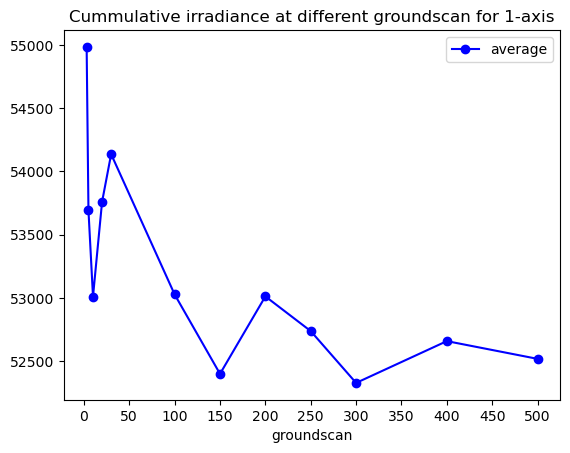

In [19]:
df1 = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': resultsdict.values()
})

df1.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Cummulative irradiance at different groundscan for 1-axis')
plt.show()